# Clustering Iris Dataset

In this Notebook, we will be implementing the k-means algorithm to group our datasets into clusters. We will test our algorithm with a small synthetic (artificial) dataset, before we use the algorithm to find association rules from a larger dataset - the [iris dataset](https://www.kaggle.com/uciml/iris).

Our Notebooks in CSMODEL are designed to be guided learning activities. To use them, simply go through the cells from top to bottom, following the directions along the way. If you find any unclear parts or mistakes in the Notebooks, email your instructor.

## Instructions
* Read each cell and implement the TODOs sequentially. The markdown/text cells also contain instructions which you need to follow to get the whole notebook working.
* Do not change the variable names unless the instructor allows you to.
* Answer all the markdown/text cells with 'Question #' on them. The answer must strictly consume one line only.
* You are expected to search how to some functions work on the Internet or via the docs. 
* The notebooks will undergo a 'Restart and Run All' command, so make sure that your code is working properly.
* You are expected to understand the dataset loading and processing separately from this class.
* You may not reproduce this notebook or share them to anyone.

## Import
Import **pandas** and **matplotlib**.

In [702]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Synthetic Dataset
Before we use a more complicated dataset, we will first demonstrate the k-means clustering using a synthetic (artificial) data drawn from a normal distribution. The synthetic dataset is composed of 2 variables - `x` and `y`, for easy visualization in a plot. The dataset contains 3 clusters of data points. Each cluster contains 100 observations.

In [705]:
cluster1 = (50, 60)
cluster2 = (80, 20)
cluster3 = (100, 70)
distance = 10
np.random.seed(8)

x1 = np.random.normal(cluster1[0], distance, size=(100,))
y1 = np.random.normal(cluster1[1], distance, size=(100,)) 

x2 = np.random.normal(cluster2[0], distance, size=(100,))
y2 = np.random.normal(cluster2[1], distance, size=(100,)) 

x3 = np.random.normal(cluster3[0], distance, size=(100,))
y3 = np.random.normal(cluster3[1], distance, size=(100,)) 

Let's visualize the synthetic dataset in a graph. Each cluster is represented in different colors.

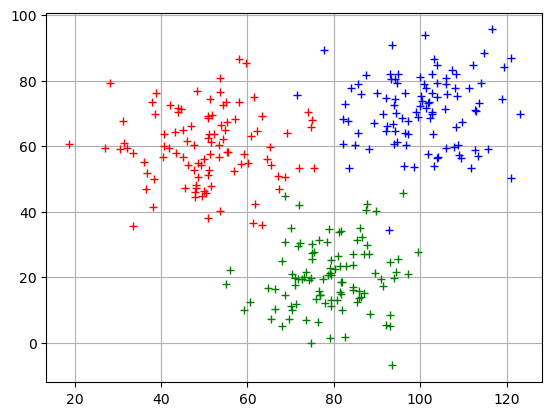

In [708]:
plt.plot(x1, y1, 'r+')
plt.plot(x2, y2, 'g+')
plt.plot(x3, y3, 'b+')
plt.grid()
plt.show()

Convert the data type of the dataset from `numpy` arrays to `pandas` `DataFrame`.

In [711]:
class1 = np.full((100,), 0, dtype=int)
class2 = np.full((100,), 1, dtype=int)
class3 = np.full((100,), 2, dtype=int)

x = pd.Series(np.hstack((x1, x2, x3)))
y = pd.Series(np.hstack((y1, y2, y3)))
c = pd.Series(np.hstack((class1, class2, class3)))

syn_df = pd.DataFrame({'x': x, 'y': y, 'class': c})

Show the contents of the `DataFrame` which contains the set of 300 randomly generated points.

In [714]:
syn_df

,x,y,class
0,50.912047,68.538629,0
1,60.912827,63.073787,0
2,30.530297,59.277579,0
3,36.136505,55.311523,0
4,27.035084,59.345611,0
...,...,...,...
295,83.456567,53.361282,2
296,104.149834,56.687694,2
297,115.688819,59.167563,2
298,98.963170,70.555246,2


Display dataset info using the `info` function.

In [717]:
syn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    float64
 1   y       300 non-null    float64
 2   class   300 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 6.0 KB


## Creating Clusters in the Synthetic Dataset using k-Means Algorithm
Open `kmeans.py` file. Some of the functions in the `KMeans` class are not yet implemented. We will implement the missing parts of this class.

Import the `KMeans` class.

In [721]:
from kmeans import KMeans

Instantiate a `KMeans` object with `k` equal to `3`, `start_var` equal to `0`, `end_var` equal to `2`, `num_observations` equal to `300`, and `data` equal to the `DataFrame` object which represents our synthetic dataset. The parameter `k` indicates the number of clusters that we want to create from the data. The parameters `start_var` and the `end_var` indicate the starting index and the ending index, respectively, of variables (columns) that we need to use as we create clusters from the dataset. This is useful if you want to exclude some columns of the `DataFrame` from the calculation when creating clusters. The parameter `num_observations` represents the total number of observations (rows) in the dataset. The parameter `data` is the `DataFrame` representation of the dataset that we want to cluster.

In [724]:
kmeans = KMeans(3, 0, 2, 300, syn_df)

Open `kmeans.py` file and complete the `get_euclidean_distance()` function. This function returns the Euclidean distance between 2 data points `p` and `q`. 

$$D(p, q)=\sqrt{\sum_{i=0}^{n} (q_i - p_i)^2}$$

This function has 2 parameters - `point1` and `point2`. You may pass these combinations of data types in this function:
- a `Series` and a `Series` - the function returns a single distance based on these two datapoints. The data type of the result is `np.float64`.
- a `DataFrame` and a `Series` - the returns a `Series` of distances of a single data point (represented as a `Series`) and a set of data points (represented as a `DataFrame`). If the shape of the `DataFrame` is (3, 2), the shape of the `Series` should be (2,) to enable broadcasting. This operation will result to a `Series` of shape (3,).

Implement the `get_euclidean_distance()` function. Inline comments should help you in completing the contents of the function. Upon implementing the function, execute the code below then answer the questions.

Suppose we create two data points with 2 variables generated from random values. Let's call the `get_euclidean_distance()` function and compute its Euclidean distance.

In [729]:
np.random.seed(8)
point1 = np.random.randint(1, 10, size=(2,))
point2 = np.random.randint(1, 10, size=(2,))

s_point1 = pd.Series(point1)
s_point2 = pd.Series(point2)
distance = kmeans.get_euclidean_distance(s_point1, s_point2)

print('Point1:\n' + str(point1))
print('Point2:\n' + str(point2))
print('Distance:\n' + str(distance.round(2)))

Point1:
[4 5]
Point2:
[2 6]
Distance:
2.24


**Question #1:** What is the distance between the two data points? Limit to 2 decimal places.

Answer: 2.24

Suppose we create a set of data points and a single data point. Let's call the `get_euclidean_distance()` function and compute their Euclidean distance.

In [733]:
np.random.seed(8)
point1 = np.random.randint(1, 10, size=(3,2))
point2 = np.random.randint(1, 10, size=(2,))

df_point1 = pd.DataFrame(point1)
s_point2 = pd.Series(point2)
distance = kmeans.get_euclidean_distance(df_point1, s_point2)

print('Point1:\n' + str(point1))
print('Point2:\n' + str(point2))
print('Distances:\n' + str(distance.round(2)))

Point1:
[[4 5]
 [2 6]
 [9 4]]
Point2:
[9 1]
Distances:
0    6.4
1    8.6
2    3.0
dtype: float64


**Question #2:** What is the distance between the second point in `df_point1` and `s_point2`? Limit to 2 decimal places.

Answer: 8.6

Open `kmeans.py` file and complete the `initialize_centroids()` function. This function initializes `k` centroids. This function picks a random point from the dataset as the first centroid, then iteratively picks points that are farthest from the current set of centroids.

Implement the `initialize_centroids()` function. Inline comments should help you in completing the contents of the function. Upon implementing the function, execute the code below then answer the questions.

In [738]:
centroids = kmeans.initialize_centroids(syn_df)
centroids.round(2)

C:\Users\ronan\kmeans.py:60: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.centroids = pd.concat([self.centroids, point], ignore_index=True)


,x,y
0,53.75,76.38
1,93.54,-6.86
2,123.06,69.74


**Question #3:** What are the coordinates of the the first centroid? Limit to 2 decimal places.

Answer: 53.75,	76.38

**Question #4:** What are the coordinates of the the third centroid? Limit to 2 decimal places.

Answer: 123.06,	69.74

Let's visualize the initial location of our centroids.

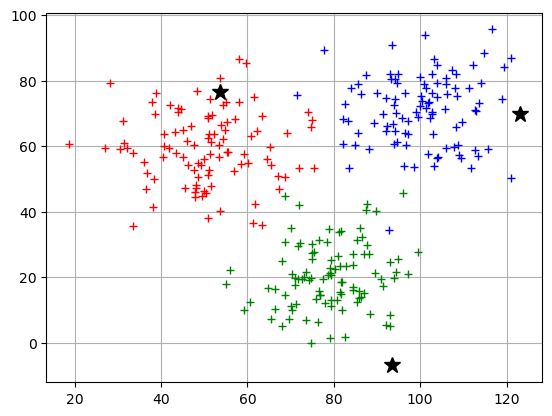

In [743]:
plt.plot(syn_df.loc[syn_df['class'] == 0, 'x'], syn_df.loc[syn_df['class'] == 0, 'y'], 'r+')
plt.plot(syn_df.loc[syn_df['class'] == 1, 'x'], syn_df.loc[syn_df['class'] == 1, 'y'], 'g+')
plt.plot(syn_df.loc[syn_df['class'] == 2, 'x'], syn_df.loc[syn_df['class'] == 2, 'y'], 'b+')

for i in range(len(kmeans.centroids)):
    plt.plot(kmeans.centroids.iloc[i]['x'], kmeans.centroids.iloc[i]['y'], 'k*', ms=12)

plt.grid()

**Sanity Check:** The initial location of your centroids should look like this:
<img src="img/initial_centroids.png" alt="Initial Centroid Locations" style="width: 350px;"/>

Open `kmeans.py` file and complete the `group_observations()` function. This function returns the clusters of each data point in the dataset given the current set of centroids.

Implement the `group_observations()` function. Inline comments should help you in completing the contents of the function. Upon implementing the function, execute the code below then answer the questions.

In [748]:
clusters = kmeans.group_observations(syn_df)
print('Number of data points in each cluster:')
print('Cluster 0: ', clusters.loc[clusters == 0].shape[0])
print('Cluster 1: ', clusters.loc[clusters == 1].shape[0])
print('Cluster 2: ', clusters.loc[clusters == 2].shape[0])

Number of data points in each cluster:
Cluster 0:  116
Cluster 1:  94
Cluster 2:  90


**Question #5:** After clustering the data points using the initial values of the centroids, how many data points are included in cluster 0?

Answer: 116

**Question #6:** After clustering the data points using the initial values of the centroids, how many data points are included in cluster 2?

Answer: 90

Open `kmeans.py` file and complete the `adjust_centroids()` function. This function adjusts the location of centroids based on the average of the values of the data points in their corresponding clusters.

Implement the `adjust_centroids()` function. Inline comments should help you in completing the contents of the function. Upon implementing the function, execute the code below then answer the questions.

In [754]:
new_centroids = kmeans.adjust_centroids(syn_df, clusters)
new_centroids.round(2)

,x,y,class
group,,,
0,54.73,60.45,0.25
1,79.20,18.80,1.01
2,102.50,69.98,1.96


**Question #7:** After clustering the dataset in one iteration, what are the updated coordinates of the the second centroid? Limit to 2 decimal places.

Answer: 79.20,	18.80	

After the first iteration of the k-means algorithm, let's visualize the updated location of our centroids.

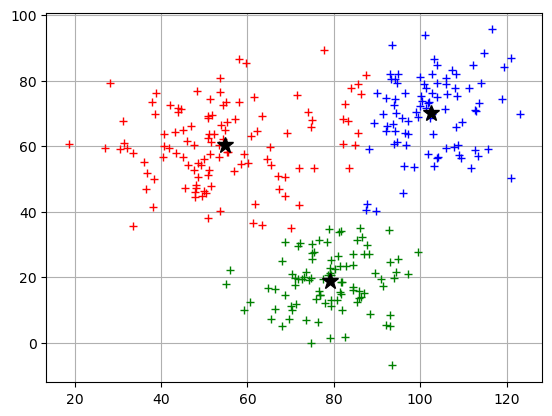

In [758]:
plt.plot(syn_df.loc[clusters == 0, 'x'], syn_df.loc[clusters == 0, 'y'], 'r+')
plt.plot(syn_df.loc[clusters == 1, 'x'], syn_df.loc[clusters == 1, 'y'], 'g+')
plt.plot(syn_df.loc[clusters == 2, 'x'], syn_df.loc[clusters == 2, 'y'], 'b+')

for i in range(len(kmeans.centroids)):
    plt.plot(new_centroids.iloc[i]['x'], new_centroids.iloc[i]['y'], 'k*', ms=12)

plt.grid()

**Sanity Check:** After the first iteration of the k-means algorithm, the updated location of your centroids should look like this:
<img src="img/centroids_iter1.png" alt="Centroid Location after Iteration 1" style="width: 350px;"/>

Open `kmeans.py` file and complete the `train()` function. This function returns a `Series` which represents the final clusters of each data point in the dataset. This function stops clustering if one of the following is met:
- The values of the centroids do not change.
- The clusters of each data point do not change.
- The maximum number of iterations is met.

Implement the `train()` function. Inline comments should help you in completing the contents of the function. Upon implementing the function, execute the code below then answer the questions.

In [763]:
groups = kmeans.train(syn_df, 300)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Done clustering!


In [765]:
print('Number of data points in each cluster:')
print('Cluster 0: ', groups.loc[groups == 0].shape[0])
print('Cluster 1: ', groups.loc[groups == 1].shape[0])
print('Cluster 2: ', groups.loc[groups == 2].shape[0])

Number of data points in each cluster:
Cluster 0:  100
Cluster 1:  101
Cluster 2:  99


**Question #8:** After clustering, how many data points are included in cluster 0?

Answer: 100

**Question #9:** After clustering, how many data points are included in cluster 1?

Answer: 101

After executing the k-means algorithm, let's visualize our final clusters compared to our data.

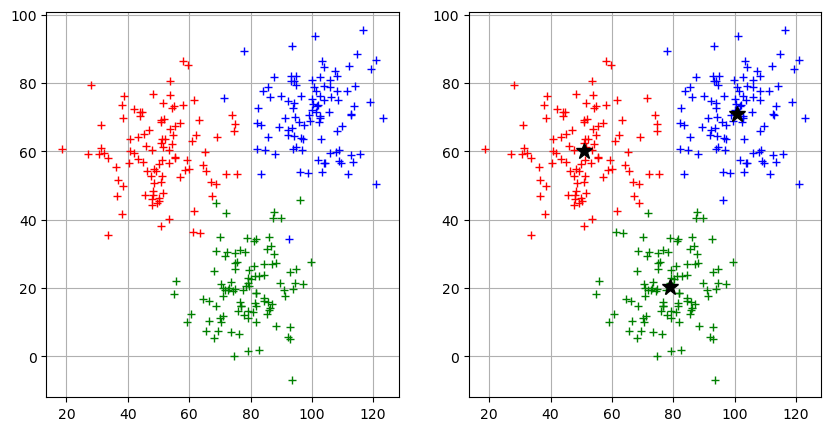

In [770]:
syn_new_df = pd.concat([syn_df.iloc[:, 0:2], groups.rename('group')], axis=1)

fig, axs = plt.subplots(1, 2, figsize=(10,5))

axs[0].plot(syn_df.loc[syn_df['class'] == 0, 'x'], syn_df.loc[syn_df['class'] == 0, 'y'], 'r+')
axs[0].plot(syn_df.loc[syn_df['class'] == 1, 'x'], syn_df.loc[syn_df['class'] == 1, 'y'], 'g+')
axs[0].plot(syn_df.loc[syn_df['class'] == 2, 'x'], syn_df.loc[syn_df['class'] == 2, 'y'], 'b+')

axs[1].plot(syn_new_df.loc[syn_new_df['group'] == 0, 'x'], syn_new_df.loc[syn_new_df['group'] == 0, 'y'], 'r+')
axs[1].plot(syn_new_df.loc[syn_new_df['group'] == 1, 'x'], syn_new_df.loc[syn_new_df['group'] == 1, 'y'], 'g+')
axs[1].plot(syn_new_df.loc[syn_new_df['group'] == 2, 'x'], syn_new_df.loc[syn_new_df['group'] == 2, 'y'], 'b+')

for i in range(len(kmeans.centroids)):
    axs[1].plot(kmeans.centroids.iloc[i]['x'], kmeans.centroids.iloc[i]['y'], 'k*', ms=12)

axs[0].grid()
axs[1].grid()

## Iris Dataset
For this notebook, we will work on a dataset called `iris dataset`. This dataset includes three iris species with 50 samples each as well as some properties about each plant. One plant species is linearly separable from the other two, but the other two are not linearly separable from each other.

The dataset is provided to you as a `.csv` file. `.csv` means comma-separated values. You can open the file in Notepad to see how it is exactly formatted.

If you view the `.csv` file in Excel, you can see that our dataset contains 150 **observations** (rows) across 6 **variables** (columns). The following are the descriptions of each variable in the dataset.

- **`Id`**: Identifier.
- **`SepalLengthCm`**: Sepal length in centimeters
- **`SepalWidthCm`**: Sepal width in centimeters
- **`PetalLengthCm`**: Petal length in centimeters
- **`PetalWidthCm`**: Petal width in centimeters
- **`Species`**: Species of iris - `Iris-setosa`; `Iris-versicolor`; `Iris-virginica`

Let's read the dataset.

In [775]:
iris_df = pd.read_csv('iris.csv')

Whenever we load a new dataset, it is generally a good idea to call the [`info`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) function, which displays general information about the dataset.

In [778]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Instantiate a `KMeans` object with `k` equal to `3`, `start_var` equal to `1`, `end_var` equal to `5`, `num_observations` equal to `150`, and `data` equal to the `DataFrame` object which represents the iris dataset. 

In [781]:
kmeans = KMeans(3, 1, 5, 150, iris_df)

Initialize the centroids.

In [784]:
kmeans.initialize_centroids(iris_df)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,4.9,3.1,1.5,0.1
1,7.7,2.6,6.9,2.3
2,4.9,2.5,4.5,1.7


Cluster the dataset.

In [787]:
groups = kmeans.train(iris_df, 300)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Done clustering!


Check the number of  per class in each cluster. Answer the questions below.

In [790]:
cluster_0 = iris_df.loc[groups == 0]
cluster_1 = iris_df.loc[groups == 1]
cluster_2 = iris_df.loc[groups == 2]

print('Number of data points in each cluster:')
print('Cluster 0:')
print('Class Iris-setosa:\t', cluster_0.loc[cluster_0['Species'] == 'Iris-setosa'].shape[0])
print('Class Iris-versicolor:\t', cluster_0.loc[cluster_0['Species'] == 'Iris-versicolor'].shape[0])
print('Class Iris-virginica:\t', cluster_0.loc[cluster_0['Species'] == 'Iris-virginica'].shape[0])
print('Cluster 1:')
print('Class Iris-setosa:\t', cluster_1.loc[cluster_1['Species'] == 'Iris-setosa'].shape[0])
print('Class Iris-versicolor:\t', cluster_1.loc[cluster_1['Species'] == 'Iris-versicolor'].shape[0])
print('Class Iris-virginica:\t', cluster_1.loc[cluster_1['Species'] == 'Iris-virginica'].shape[0])
print('Cluster 2:')
print('Class Iris-setosa:\t', cluster_2.loc[cluster_2['Species'] == 'Iris-setosa'].shape[0])
print('Class Iris-versicolor:\t', cluster_2.loc[cluster_2['Species'] == 'Iris-versicolor'].shape[0])
print('Class Iris-virginica:\t', cluster_2.loc[cluster_2['Species'] == 'Iris-virginica'].shape[0])

Number of data points in each cluster:
Cluster 0:
Class Iris-setosa:	 50
Class Iris-versicolor:	 0
Class Iris-virginica:	 0
Cluster 1:
Class Iris-setosa:	 0
Class Iris-versicolor:	 2
Class Iris-virginica:	 36
Cluster 2:
Class Iris-setosa:	 0
Class Iris-versicolor:	 48
Class Iris-virginica:	 14


**Question #10:** After clustering, what class of plant is prominent in cluster 0?

Answer: Class Iris-setosa

**Question #11:** After clustering, what class of plant is prominent in cluster 1?

Answer: Class Iris-virginica

**Question #12:** After clustering, what class of plant is prominent in cluster 2?

Answer: Class Iris-virginica